In [12]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [14]:
PROJECT_DIRECTORY = '/Users/abhinavramalingam/Documents/Uppsala/IID/Assignments/assignment_2/'

In [15]:
dataset_file = PROJECT_DIRECTORY + 'dataset.csv'
data = pd.read_csv(dataset_file)  


X = data.drop(columns=['emotion'])
y = data['emotion']

y = pd.get_dummies(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [16]:
# Define the MLP model
model = Sequential()

# Input layer (number of features = X_train.shape[1])
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with ReLU activation
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Third hidden layer
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer (number of classes)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,071 (15.90 KB)

 Trainable params: 4,071 (15.90 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1328 - loss: 1.9678 - val_accuracy: 0.3362 - val_loss: 1.7493
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.3585 - loss: 1.6835 - val_accuracy: 0.5259 - val_loss: 1.5406
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.5303 - loss: 1.4462 - val_accuracy: 0.5517 - val_loss: 1.3783
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.5532 - loss: 1.2776 - val_accuracy: 0.5603 - val_loss: 1.2677
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.5954 - loss: 1.1445 - val_accuracy: 0.5431 - val_loss: 1.2128
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.6254 - loss: 1.0857 - val_accuracy: 0.5431 - val_loss: 1.1696
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.6368 - loss: 1.0404 - val_accuracy: 0.5517 - val_loss: 1.1518
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.6296 - loss: 1.0120 - val_accura

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test.values, axis=1)

# Classification report and accuracy
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))
print(f"Test Accuracy: {accuracy_score(y_true_labels, y_pred_labels) * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5962 - loss: 1.1989  
Test Accuracy: 61.54%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.33      0.12      0.18         8
           2       0.25      0.17      0.20         6
           3       0.81      0.93      0.86        27
           4       0.51      0.68      0.58        37
           5       0.00      0.00      0.00         9
           6       0.75      0.79      0.77        19

    accuracy                           0.62       117
   macro avg       0.45      0.45      0.44       117
weighted avg       0.55      0.62      0.58       117

Test Accuracy: 61.54%


/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [19]:
# List of architectures to try (number of hidden layers and neurons)
neurons = [32, 48, 64, 128]  # Different number of neurons in hidden layers
hidden_layer_options = [1, 2, 3]  # Number of hidden layers to try
best_accuracy = 0
accuracies = []

# Iterate over different combinations of neurons and number of hidden layers
for num_layers in hidden_layer_options:
    for neuron in neurons:
        # Build a model with the current configuration
        model = Sequential()
        model.add(Dense(neuron, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
        for _ in range(num_layers - 1):  # Add the remaining hidden layers
            model.add(Dense(neuron // 2, activation='relu'))
        model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer
        
        # Compile the model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                            validation_data=(X_val, y_val), callbacks=[early_stopping])
        
        # Evaluate on test set
        _, accuracy = model.evaluate(X_test, y_test)
        accuracies.append((num_layers, neuron, accuracy))  # Store the result

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

# Print the best accuracy
print(f"Best Model Test Accuracy: {best_accuracy * 100:.2f}%")

# Plotting the results
# Prepare the data for the plot (x-axis = neurons, y-axis = accuracy for each layer count)
accuracies_np = np.array(accuracies)
neurons_list = accuracies_np[:, 1]  # Neurons
accuracies_per_layers = {layer: [] for layer in hidden_layer_options}

for (num_layers, neuron, accuracy) in accuracies:
    accuracies_per_layers[num_layers].append((neuron, accuracy))



Epoch 1/50


/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1197 - loss: 2.1300 - val_accuracy: 0.2328 - val_loss: 1.8417
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.2784 - loss: 1.7583 - val_accuracy: 0.4483 - val_loss: 1.6101
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.4911 - loss: 1.4813 - val_accuracy: 0.5345 - val_loss: 1.4667
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.5321 - loss: 1.3656 - val_accuracy: 0.5431 - val_loss: 1.3820
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.5624 - loss: 1.2621 - val_accuracy: 0.5517 - val_loss: 1.3325
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.5661 - loss: 1.2130 - val_accuracy: 0.5776 - val_loss: 1.2925
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.6143 - loss: 1.1394 - val_accuracy: 0.5603 - val_loss: 1.2693
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.6084 - loss: 1.1384 - val_accuracy: 0.5517 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1786 - loss: 2.1955 - val_accuracy: 0.3103 - val_loss: 1.7277
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.3077 - loss: 1.6957 - val_accuracy: 0.5259 - val_loss: 1.4820
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.5142 - loss: 1.4114 - val_accuracy: 0.5603 - val_loss: 1.3513
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.5687 - loss: 1.2374 - val_accuracy: 0.5862 - val_loss: 1.2880
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.5856 - loss: 1.1871 - val_accuracy: 0.5862 - val_loss: 1.2525
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.6032 - loss: 1.0967 - val_accuracy: 0.5776 - val_loss: 1.2307
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.6040 - loss: 1.0732 - val_accuracy: 0.5690 - val_loss: 1.2171
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.5976 - loss: 1.1030 - val_accuracy: 0.5776 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1807 - loss: 1.9958 - val_accuracy: 0.5345 - val_loss: 1.5420
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.5052 - loss: 1.5261 - val_accuracy: 0.5776 - val_loss: 1.3319
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.5651 - loss: 1.2974 - val_accuracy: 0.5948 - val_loss: 1.2578
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.6007 - loss: 1.1742 - val_accuracy: 0.5948 - val_loss: 1.2220
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.6134 - loss: 1.1267 - val_accuracy: 0.5948 - val_loss: 1.2004
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.6178 - loss: 1.0804 - val_accuracy: 0.5776 - val_loss: 1.1827
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5989 - loss: 1.1024 - val_accuracy: 0.5690 - val_loss: 1.1744
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.6377 - loss: 1.0060 - val_accuracy: 0.5776 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1959 - loss: 1.9210 - val_accuracy: 0.5431 - val_loss: 1.4633
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.5933 - loss: 1.2937 - val_accuracy: 0.5776 - val_loss: 1.2958
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6049 - loss: 1.1661 - val_accuracy: 0.5776 - val_loss: 1.2440
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.6204 - loss: 1.0874 - val_accuracy: 0.5690 - val_loss: 1.2233
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.6522 - loss: 1.0148 - val_accuracy: 0.5603 - val_loss: 1.2018
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.6106 - loss: 1.0251 - val_accuracy: 0.5603 - val_loss: 1.1976
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.6622 - loss: 0.9674 - val_accuracy: 0.5517 - val_loss: 1.1916
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.6580 - loss: 0.9343 - val_accuracy: 0.5517 - val_loss

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1094 - loss: 2.1166 - val_accuracy: 0.1897 - val_loss: 1.8800
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.3058 - loss: 1.7961 - val_accuracy: 0.3362 - val_loss: 1.6873
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.4112 - loss: 1.5890 - val_accuracy: 0.4741 - val_loss: 1.5124
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.4897 - loss: 1.4206 - val_accuracy: 0.5172 - val_loss: 1.3781
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.5833 - loss: 1.2291 - val_accuracy: 0.5431 - val_loss: 1.3069
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.5757 - loss: 1.1482 - val_accuracy: 0.5517 - val_loss: 1.2722
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5968 - loss: 1.1811 - val_accuracy: 0.5690 - val_loss: 1.2516
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.6155 - loss: 1.1226 - val_accuracy: 0.5690 - val_loss

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1850 - loss: 1.9980 - val_accuracy: 0.4741 - val_loss: 1.6074
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.5222 - loss: 1.4760 - val_accuracy: 0.5086 - val_loss: 1.4305
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.5684 - loss: 1.2900 - val_accuracy: 0.5345 - val_loss: 1.3451
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.5761 - loss: 1.2049 - val_accuracy: 0.5345 - val_loss: 1.2982
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.6043 - loss: 1.1232 - val_accuracy: 0.5431 - val_loss: 1.2616
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.6290 - loss: 1.0586 - val_accuracy: 0.5345 - val_loss: 1.2403
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.6345 - loss: 1.0096 - val_accuracy: 0.5345 - val_loss: 1.2275
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.6481 - loss: 1.0191 - val_accuracy: 0.5690 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2750 - loss: 1.8443 - val_accuracy: 0.5000 - val_loss: 1.5447
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.5146 - loss: 1.4278 - val_accuracy: 0.5086 - val_loss: 1.3521
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.5327 - loss: 1.2839 - val_accuracy: 0.5603 - val_loss: 1.2801
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.5901 - loss: 1.1465 - val_accuracy: 0.5776 - val_loss: 1.2186
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.6260 - loss: 1.1094 - val_accuracy: 0.5948 - val_loss: 1.1840
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.6464 - loss: 1.0376 - val_accuracy: 0.5948 - val_loss: 1.1631
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.6351 - loss: 0.9972 - val_accuracy: 0.5776 - val_loss: 1.1512
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.6748 - loss: 0.9226 - val_accuracy: 0.5776 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3150 - loss: 1.7991 - val_accuracy: 0.5690 - val_loss: 1.3767
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.5694 - loss: 1.2504 - val_accuracy: 0.5690 - val_loss: 1.2584
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.6333 - loss: 1.0511 - val_accuracy: 0.5776 - val_loss: 1.2127
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.6736 - loss: 0.9493 - val_accuracy: 0.5862 - val_loss: 1.2135
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.6112 - loss: 0.9863 - val_accuracy: 0.6207 - val_loss: 1.1967
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.6419 - loss: 0.9642 - val_accuracy: 0.6121 - val_loss: 1.1887
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.6792 - loss: 0.8490 - val_accuracy: 0.6034 - val_loss: 1.1854
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.6618 - loss: 0.8940 - val_accuracy: 0.6121 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1971 - loss: 1.9309 - val_accuracy: 0.4397 - val_loss: 1.7255
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.5273 - loss: 1.6177 - val_accuracy: 0.5690 - val_loss: 1.5294
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.5479 - loss: 1.4356 - val_accuracy: 0.5776 - val_loss: 1.3865
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.5608 - loss: 1.2543 - val_accuracy: 0.5603 - val_loss: 1.3113
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.5545 - loss: 1.2084 - val_accuracy: 0.5776 - val_loss: 1.2669
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.6246 - loss: 1.0976 - val_accuracy: 0.5862 - val_loss: 1.2435
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.5742 - loss: 1.1750 - val_accuracy: 0.5776 - val_loss: 1.2198
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.6191 - loss: 1.0497 - val_accuracy: 0.5776 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1599 - loss: 1.9071 - val_accuracy: 0.4397 - val_loss: 1.7040
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.4286 - loss: 1.6082 - val_accuracy: 0.5517 - val_loss: 1.4557
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.5402 - loss: 1.3636 - val_accuracy: 0.5603 - val_loss: 1.3195
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.5712 - loss: 1.2283 - val_accuracy: 0.5862 - val_loss: 1.2522
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.5962 - loss: 1.1235 - val_accuracy: 0.5948 - val_loss: 1.2175
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.6223 - loss: 1.0302 - val_accuracy: 0.5948 - val_loss: 1.1970
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.6106 - loss: 1.0723 - val_accuracy: 0.5862 - val_loss: 1.1850
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.6115 - loss: 1.0160 - val_accuracy: 0.5948 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2636 - loss: 1.8710 - val_accuracy: 0.5603 - val_loss: 1.5503
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.5695 - loss: 1.4109 - val_accuracy: 0.6121 - val_loss: 1.2956
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.6071 - loss: 1.1749 - val_accuracy: 0.5690 - val_loss: 1.2253
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.6298 - loss: 1.0763 - val_accuracy: 0.6034 - val_loss: 1.1822
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.6424 - loss: 1.0278 - val_accuracy: 0.6034 - val_loss: 1.1657
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.6308 - loss: 1.0341 - val_accuracy: 0.6207 - val_loss: 1.1409
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.6535 - loss: 0.9697 - val_accuracy: 0.6121 - val_loss: 1.1322
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.6485 - loss: 0.9412 - val_accuracy: 0.6293 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3667 - loss: 1.6939 - val_accuracy: 0.5603 - val_loss: 1.3203
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.5847 - loss: 1.2103 - val_accuracy: 0.5431 - val_loss: 1.2131
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.6378 - loss: 1.0298 - val_accuracy: 0.5862 - val_loss: 1.1762
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.6550 - loss: 0.9674 - val_accuracy: 0.5690 - val_loss: 1.1515
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.6412 - loss: 0.9833 - val_accuracy: 0.5948 - val_loss: 1.1307
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.6645 - loss: 0.8773 - val_accuracy: 0.6034 - val_loss: 1.1281
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6695 - loss: 0.8793 - val_accuracy: 0.5776 - val_loss: 1.1486
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.6954 - loss: 0.8066 - val_accuracy: 0.5776 - val_loss

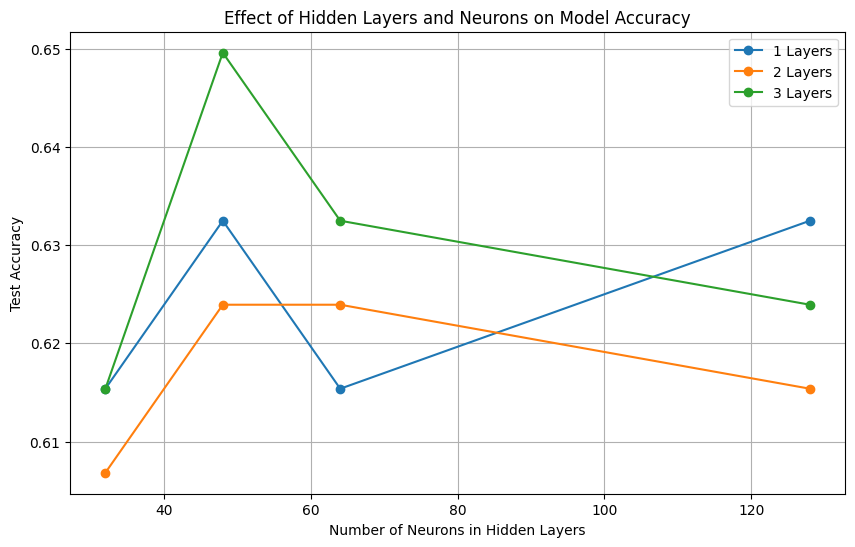

In [20]:
# Plot the graph
plt.figure(figsize=(10, 6))
for num_layers, results in accuracies_per_layers.items():
    neurons_vals, accuracies_vals = zip(*results)
    plt.plot(neurons_vals, accuracies_vals, label=f'{num_layers} Layers', marker='o')

plt.xlabel('Number of Neurons in Hidden Layers')
plt.ylabel('Test Accuracy')
plt.title('Effect of Hidden Layers and Neurons on Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Load the test_to_submit.csv (without the 'emotion' column)
test_to_submit = pd.read_csv('test_to_submit.csv')

# Preprocess the test data (standardize)
test_to_submit = scaler.transform(test_to_submit)

# Predict using the trained model
test_predictions = model.predict(test_to_submit)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Create a DataFrame for submission
submission = pd.DataFrame(predicted_labels, columns=['emotion'])

# Map back the predicted label indices to emotion names (assuming labels are indexed 0, 1, 2, etc.)
emotion_labels = list(y.columns)  # Get the emotion classes from the training set
submission['emotion'] = submission['emotion'].map(lambda x: emotion_labels[x])

# Save the submission file
submission.to_csv('submission.csv', index=False)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
